In [87]:
import quandl
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [88]:
quandl.ApiConfig.api_key = "m63rvKzGC4w1sG6CYRDJ"
df = quandl.get("WIKI/AMZN")
print(df.head())

             Open   High    Low  Close     Volume  Ex-Dividend  Split Ratio  \
Date                                                                          
1997-05-16  22.38  23.75  20.50  20.75  1225000.0          0.0          1.0   
1997-05-19  20.50  21.25  19.50  20.50   508900.0          0.0          1.0   
1997-05-20  20.75  21.00  19.63  19.63   455600.0          0.0          1.0   
1997-05-21  19.25  19.75  16.50  17.13  1571100.0          0.0          1.0   
1997-05-22  17.25  17.38  15.75  16.75   981400.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
1997-05-16   1.865000   1.979167  1.708333    1.729167   14700000.0  
1997-05-19   1.708333   1.770833  1.625000    1.708333    6106800.0  
1997-05-20   1.729167   1.750000  1.635833    1.635833    5467200.0  
1997-05-21   1.604167   1.645833  1.375000    1.427500   18853200.0  
1997-05-22   1.437500   1.

GET THE ADJUSTED CLOSE PRICE

In [89]:
df=df[['Adj. Close']]
print(df.head())

            Adj. Close
Date                  
1997-05-16    1.729167
1997-05-19    1.708333
1997-05-20    1.635833
1997-05-21    1.427500
1997-05-22    1.395833


            Adj. Close  Prediction
Date                              
2018-03-21     1581.86         NaN
2018-03-22     1544.10         NaN
2018-03-23     1495.56         NaN
2018-03-26     1555.86         NaN
2018-03-27     1497.05         NaN


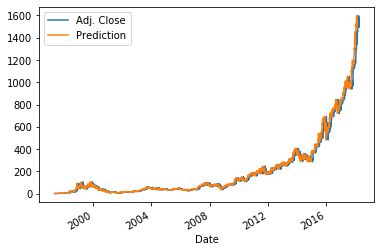

In [90]:
# A variable for predicting 'n' days out into the future
forecast_out=30
#create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)
#print the new data set
print(df.tail())
df.plot()

CREATE THE INDEPENDENT DATASET X

In [91]:
X=np.array(df.drop(['Prediction'],1))
#remove the last n rows
X=X[:-forecast_out]
print(X)

[[   1.72916667]
 [   1.70833333]
 [   1.63583333]
 ...
 [1350.47      ]
 [1338.99      ]
 [1386.23      ]]


CREATE THE DEPENDENT DATA SET Y

In [92]:
y=np.array(df['Prediction'])
#get all of the values except last n rows
y=y[:-forecast_out]
print(y)

[1.54166667e+00 1.51583333e+00 1.58833333e+00 ... 1.49556000e+03
 1.55586000e+03 1.49705000e+03]


SPLIT THE DATA

In [93]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

CREATE THE SUPPORT VECTOR MACHINE

In [94]:
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.1)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

TESTING MODEL

In [95]:
svm_confidence=svr_rbf.score(x_test,y_test)
print("svm_confidence",svm_confidence)

svm_confidence 0.949958863503793


CREATE AND TRAIN THE LINEAR REGRESSION MODEL

In [96]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

TEST THE MODEL

In [97]:
lr_confidence=lr.score(x_test,y_test)
print("lr_confidence",lr_confidence)

lr_confidence 0.9856121677191807


SET X_FORECAST EQUAL THE LAST 30 ROWS OF THE ORIGINAL DATA SET FROM Adj. Close COLUMN

In [98]:
x_forecast=np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[1414.51]
 [1451.05]
 [1461.76]
 [1448.69]
 [1468.35]
 [1482.92]
 [1484.76]
 [1500.  ]
 [1521.95]
 [1511.98]
 [1512.45]
 [1493.45]
 [1500.25]
 [1523.61]
 [1537.64]
 [1545.  ]
 [1551.86]
 [1578.89]
 [1598.39]
 [1588.18]
 [1591.  ]
 [1582.32]
 [1571.68]
 [1544.93]
 [1586.51]
 [1581.86]
 [1544.1 ]
 [1495.56]
 [1555.86]
 [1497.05]]


PRINT LINEAR REGRESSION MODEL PREDICTION FOR NEXT 'n' DAYS

In [99]:
lr_prediction=lr.predict(x_forecast)
print(lr_prediction)

[1504.1968225  1543.15394047 1554.57240608 1540.63782666 1561.59833403
 1577.13213833 1579.09385417 1595.34197891 1618.74396959 1608.11445492
 1608.61554538 1588.35869695 1595.60851639 1620.51377845 1635.47186179
 1643.31872518 1650.63251361 1679.45054587 1700.24046926 1689.3550786
 1692.36162137 1683.10744009 1671.76360497 1643.24409469 1687.57460824
 1682.61701113 1642.35919026 1590.60827328 1654.89711328 1592.19683665]


PRINT SUPPORT VECTOR MACHINE NODEL FOR NEXT 'n' DAYS

In [100]:
svm_prediction=svr_rbf.predict(x_forecast)
print(svm_prediction)

[1010.96147992 1550.88051184  677.7095272  1081.46288409  677.67662362
  677.67662362  677.67662362  677.67662362  677.67662362  677.67662362
  677.67662362  677.67662362  677.67662362  677.67662362  677.67662362
  677.67662362  677.67662362  677.67662362  677.67662362  677.67662362
  677.67662362  677.67662362  677.67662362  677.67662362  677.67662362
  677.67662362  677.67662362  677.67662362  677.67662362  677.67662362]
